<a href="https://colab.research.google.com/github/TonyPham2501/AI_Week7/blob/main/Week32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=d90bb65b17815831595c903ba6e029515305d9e2741a1952332dd884d96c246e
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


So nay la:  4


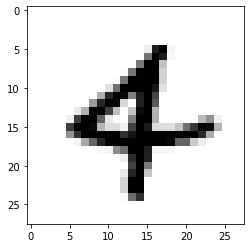

In [20]:

from keras.datasets import mnist 
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
hinh = train_images[150]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('So nay la: ',train_labels[150])


([], [])

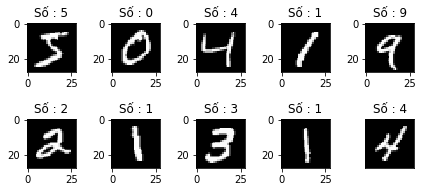

In [21]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation = 'none')
  plt.title('Số : {}'.format(train_labels[i]))
plt.xticks([])
plt.yticks([])

In [22]:
from keras import models
from keras.layers import Dense


In [23]:
from keras.layers.attention.multi_head_attention import activation
from keras.models import Sequential



In [24]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [25]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

from keras.utils import to_categorical #one hot enccoding
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(train_labels,10)



In [26]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Độ chính xác trên tập kiểm tra: ',test_acc)
print('Hàm mất mát trên tập kiểm tra: ',test_loss)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2642 - accuracy: 0.9244
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1069 - accuracy: 0.9687
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0701 - accuracy: 0.9791
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0514 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0383 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0288 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0216 - accuracy: 0.9940
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0164 - accuracy: 0.9958
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0124 - accuracy: 0.9966
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0099 - accuracy: 0.

ValueError: ignored

In [28]:
model.save('model1.h5')


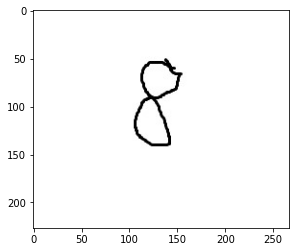

In [70]:
from keras.utils import load_img

url='hinh.jpg'
img=load_img(url)
plt.imshow(img)



In [71]:
from keras.utils.image_utils import img_to_array
img=load_img(url,target_size=(28,28))
img=img_to_array(img)
img = img[:,:,0]
img=img.reshape(1,28*28)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)



1/1 [==============================] - 0s 21ms/step


array([8])

In [74]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

